# ARIMA 

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

Wczytanie danych "Shampoo Sales Dataset", które opisują miesięczną liczbę sprzedaży szamponu przez okres 3 lat.

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('data/sales-of-shampoo-over-a-three-ye.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
rng1 = pd.date_range('1901-01-01', periods=len(series), freq='M')
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


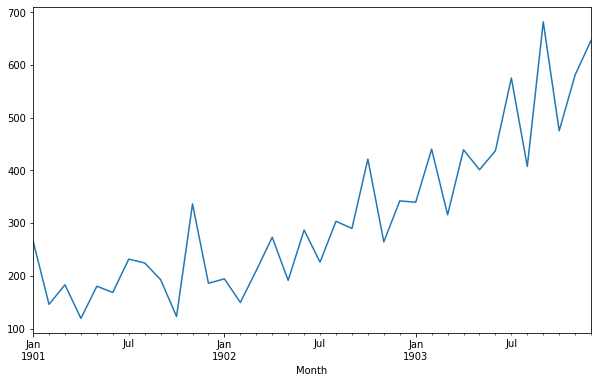

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

Po pierwsze, będziemy testować nasze modele na ostatnim roku. Biorąc pod uwagę dane miesięczne, oznacza to, że 12 ostatnich obserwacji zostanie wykorzystanych jako zbiór testowy.

W celu oceny skuteczności modelu, zastosujemy metodę walidacji walk-forward. Oznacza to, że nauczymy model na danych historycznych. Będziemy prognozować najbliższy punkt i oceniać poziom predykcji. Obserwacja zostanie następnie dodana do zestawu danych uczących i proces powtórzony.


In [4]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
X = series.values
train, test = X[0:-12], X[-12:]

In [6]:
print(series.index)
rng1 = pd.date_range('1900-12-01', periods=len(X)-12, freq='M').shift(1, freq='D')
rng2 =pd.date_range('1902-12-01', periods=12, freq='M').shift(1, freq='D')
print(rng1)
print(rng2)

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)
DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
             

In [7]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
trainS=pd.Series(train, index=rng1)
testS=pd.Series(test,index=rng2)

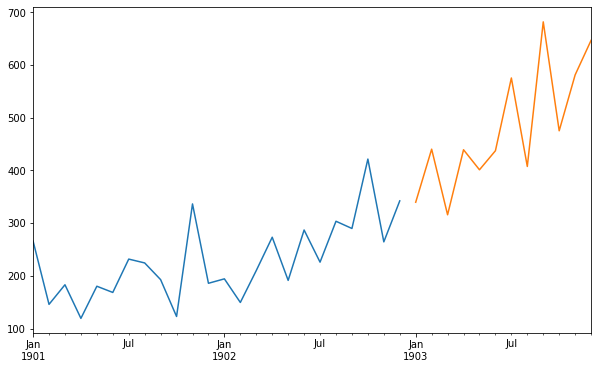

In [8]:
plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
plt.show()

# Zadanie 1
Naucz modela ARIMA(4,1,0), zwizualizuj wyniki predykcji i oblicz błąd RMSE dla danych testowych.
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

# Zadanie 2
Zwizualizuj na jednym wykresie dane trenujące, testujące i wartości przewidziane przez model

# Jeżeli nie będe uczył co krok

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(trainS, order=(4,2,0))
model_fit = model.fit()

predictions1 = model_fit.predict(start='1903-01-01',end='1903-12-01', dynamic=True, typ ='levels')
predictions = []
# for t in range(len(test)):
#     predictions.append(model_fit.forecast()[0][0])
# predictionsS=pd.Series(predictions,index=rng2)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
predictions1.plot()
plt.show()


fig, ax = plt.subplots()
ax = trainS.plot(label="train")
ax = testS.plot(label="test")
fig = model_fit.plot_predict(start='1903-01-01',end='1903-12-01', dynamic=True, ax=ax, plot_insample=False)
fig.set_size_inches([10,6])
plt.show()

# Zadanie 3
Naucz model:

    - (2,1,1)
    - (4,2,1)
    - (5,1,0)
    - (6,1,1)

# Zadanie 4

Wykonaj ARIMA(4,1,3) na poniższych danych. Weź dane z lat 1720-1950 jako dane trenujące i z lat 1951-2008 jako dane testujące.

In [ ]:
from pandas import Series
series = pd.read_csv('data/sunspots.csv', index_col = 'YEAR', squeeze = True)
series.head()

# Zadanie 5

Wykonaj ARIMA(2,1,2) na poniższych danych. Weź pierwsze 2000 wartości jako dane trenujące, a pozostałe jako dane testujące.

In [ ]:
from pandas import Series
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])
series.head()

In [ ]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

# Zadanie 6
Porównaj predykcję utworzonego modelu (wizualnie i za pomocą RMSE) z predykcją naiwną, czyli przewidywaniem w kolejnym momencie czasowym wartości z poprzedniego momentu czasowego